In [1]:
import numpy as np
#import pandas as pd
import cv2
import os
import time
import glob
import matplotlib.pyplot as plt
import hdf5storage
import scipy.io as scio
import h5py
%matplotlib inline


from keras.models import Sequential, model_from_json, Model, load_model
from keras.optimizers import SGD
from keras.layers import Input, Reshape, concatenate, Activation, Flatten, merge
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout
from keras import backend as K
from keras.callbacks import TensorBoard

/home/smiletranquilly/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def scale_invarient_error(y_true,y_pred):
    log_1=K.log(K.clip(y_pred,K.epsilon(),np.inf)+1.)
    log_2=K.log(K.clip(y_true,K.epsilon(),np.inf)+1.)
    return K.mean(K.square(log_1-log_2),axis=-1)-Lambda*K.square(K.mean(log_1-log_2,axis=-1))

def rescale(data):
    data=data.astype('float32')
    data /= 255.0   
    return data

def pred_single_image_depth_using_fine(path):
    model=load_model(fine_dir,custom_objects={'scale_invarient_error':scale_invarient_error})
    path = glob.glob(os.path.join(path, "*.jpg")) #返回所有匹配的文件路径列表
    inputs = []
    targets = []
    out = []
    for i in range(len(path)):
        img = cv2.imread(path[i])
        width = img.shape[1]
        #BGR->RGB
        pic = img[:,:width//2,:][:,:,::-1]
        target = img[:,width//2:,:]
        inputs.append(pic)
        targets.append(target)  
    inputs = np.array([cv2.resize(inputs[i],(img_cols,img_row)) for i in range(len(inputs))])
    targets = np.array([cv2.resize(targets[i],(img_cols,img_row)) for i in range(len(targets))])
    for j in range(3):
    # output[128*128]
        targets = np.array([cv2.pyrDown(targets[i]) for i in range(len(targets))])
    img_array=np.array([cv2.pyrDown(inputs[i]) for i in range(len(inputs))])
    img_array=rescale(img_array)
    targets = rescale(targets)
#     for i in range(len(path)):
#         out.append(model.predict(img_array[i]))
    out = model.predict(img_array)
    return out,targets,img_array

In [3]:
inputpath='/home/Dataset/test/'
img_row=1024
img_cols=1024
Lambda=0.5

root = '/home/smiletranquilly/Multi-Scale_Deep_Network' 
os.chdir(root)
fine_dir='./fine_data/building_fine_weights_522.h5'

In [4]:
ans,targets,img_array=pred_single_image_depth_using_fine(inputpath)
plt.imshow(ans[0])

IOError: Unable to open file (unable to open file: name = './fine_data/building_fine_weights_522.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
print targets.shape
print targets[1].shape
print ans.shape

(15, 128, 128, 3)
(128, 128, 3)
(15, 128, 128)


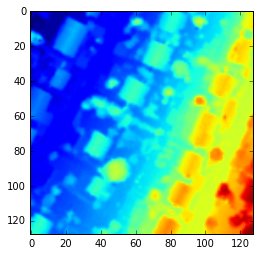

In [10]:
plt.imshow(targets[5][:,:,1])

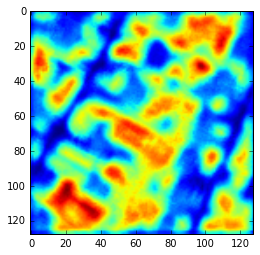

In [11]:
plt.imshow(ans[5])

(512, 512, 3)


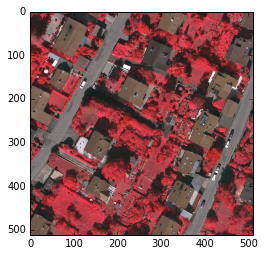

In [12]:
print img_array[0].shape
#BGR->RGB [:,:,::-1]
plt.imshow(img_array[5])

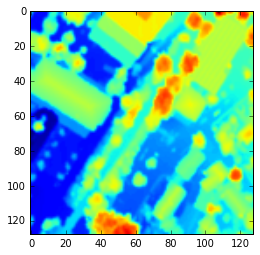

In [9]:
for i in range(len(img_array)):
    plt.imshow(img_array[i])
    plt.savefig("./inputs/inputs_"+str(i)+".jpg")
    plt.imshow(ans[i])
    plt.savefig("./output/outputs_"+str(i)+".jpg")
    plt.imshow(targets[i][:,:,1])
    plt.savefig("./target/targets_"+str(i)+".jpg")

In [14]:
import scipy
for i in range(len(img_array)):
    scipy.misc.imsave("./img/pic/inputs/inputs_"+str(i)+".jpg", img_array[i])
    scipy.misc.imsave("./img/pic/outputs/outputs_"+str(i)+".jpg", ans[i])
    scipy.misc.imsave("./img/pic/targets/targets_"+str(i)+".jpg", targets[i][:,:,1])
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


# test glob.glob

In [5]:
path = glob.glob(os.path.join(inputpath, "*.jpg")) #返回所有匹配的文件路径列表
print path

['/home/Dataset/test/top_mosaic_09cm_area23_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area30_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area28_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area15_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area37_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area13_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area5_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area7_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area3_270_row1_col2.jpg', '/home/Dataset/test/top_mosaic_09cm_area3_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area32_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area26_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area11_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area1_270_row1_col1.jpg', '/home/Dataset/test/top_mosaic_09cm_area21_270_row1_col1.jpg']


In [8]:
print str(path[0])

/home/Dataset/test/top_mosaic_09cm_area23_270_row1_col1.jpg


In [9]:
type(path[0])

str